In [ ]:
pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 120.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the `.h5ad` file using `scanpy.read_h5ad` with `backed='r+'`. This will load the metadata and allow lazy loading of the large data matrix (`adata.X`), preventing it from being loaded entirely into RAM


In [ ]:
import scanpy as sc

adata = sc.read_h5ad('/content/drive/MyDrive/vcc/vcc_data/adata_Training.h5ad', backed='r+')

print("AnnData object loaded in backed mode successfully.")
print(f"AnnData object: {adata}")
print(f"Backed mode status: {adata.isbacked}")

AnnData object loaded in backed mode successfully.
AnnData object: AnnData object with n_obs × n_vars = 221273 × 18080 backed at '/content/drive/MyDrive/vcc/vcc_data/adata_Training.h5ad'
    obs: 'target_gene', 'guide_id', 'batch'
    var: 'gene_id'
Backed mode status: True


In [ ]:
print(f"Number of observations: {adata.n_obs}")
print(f"Number of variables: {adata.n_vars}")

print("\nMemory usage of adata.obs:")
adata.obs.info(memory_usage='deep')

print("\nMemory usage of adata.var:")
adata.var.info(memory_usage='deep')

Number of observations: 221273
Number of variables: 18080

Memory usage of adata.obs:
<class 'pandas.core.frame.DataFrame'>
Index: 221273 entries, AAACAAGCAACCTTGTACTTTAGG-Flex_1_01 to TTTGTGAGTGGACACGATTCGGTT-Flex_3_16
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   target_gene  221273 non-null  category
 1   guide_id     221273 non-null  category
 2   batch        221273 non-null  category
dtypes: category(3)
memory usage: 26.7 MB

Memory usage of adata.var:
<class 'pandas.core.frame.DataFrame'>
Index: 18080 entries, SAMD11 to MT-CYB
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gene_id  18080 non-null  object
dtypes: object(1)
memory usage: 2.5 MB


When `AnnData` is loaded in backed mode (`backed='r+'`), the large data matrix (`adata.X`) is not loaded into RAM by default. Instead, it is stored on disk, and only parts of it are loaded when explicitly requested.

I can access portions of `adata.X` using slicing notation, and only the requested slice will be loaded into memory. For example, `adata.X[0:500, 0:100]` will only load the first 500 rows and 100 columns.


In [ ]:
print('Accessing a small slice of adata.X (first 500 rows, first 100 columns):')
# Accessing a slice of adata.X does not load the entire matrix into memory due to backed mode.
sliced_data = adata.X[0:500, 0:100]
print(f"Shape of the accessed slice: {sliced_data.shape}")
print(f"Type of the accessed slice: {type(sliced_data)}")


Accessing a small slice of adata.X (first 500 rows, first 100 columns):
Shape of the accessed slice: (500, 100)
Type of the accessed slice: <class 'scipy.sparse._csr.csr_matrix'>


In [30]:
sliced_data

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 22579 stored elements and shape (500, 100)>

*   The AnnData object contains 221,273 observations and 18,080 variables.
*   The metadata DataFrames `adata.obs` and `adata.var` are relatively small, consuming approximately 26.7 MB and 2.5 MB of memory, respectively.
*   The data matrix (`adata.X`) is stored in a sparse format (specifically `scipy.sparse._csr.csr_matrix`), which is memory-efficient for data with many zero values.
*   When operating in backed mode, `adata.X` supports lazy loading, meaning only requested slices of the data matrix are loaded into RAM. For example, accessing a slice of 500 rows and 100 columns was demonstrated without loading the entire matrix.


In [ ]:
adata

AnnData object with n_obs × n_vars = 221273 × 18080 backed at '/content/drive/MyDrive/vcc/vcc_data/adata_Training.h5ad'
    obs: 'target_gene', 'guide_id', 'batch'
    var: 'gene_id'

Adata obs, var parts

In [ ]:
print("First 5 rows of adata.obs:")
print(adata.obs.head())
print("\nColumns in adata.obs:")
print(adata.obs.columns.tolist())

print("\nFirst 5 rows of adata.var:")
print(adata.var.head())
print("\nColumns in adata.var:")
print(adata.var.columns.tolist())

First 5 rows of adata.obs:
                                   target_gene                   guide_id  \
AAACAAGCAACCTTGTACTTTAGG-Flex_1_01       CHMP3  CHMP3_P1P2_A|CHMP3_P1P2_B   
AAACAAGCATTGCCGCACTTTAGG-Flex_1_01        AKT2    AKT2_P1P2_A|AKT2_P1P2_B   
AAACCAATCAATGTTCACTTTAGG-Flex_1_01       SHPRH  SHPRH_P1P2_A|SHPRH_P1P2_B   
AAACCAATCCCTCGCTACTTTAGG-Flex_1_01      TMSB4X    TMSB4X_P1_A|TMSB4X_P1_B   
AAACCAATCTAAATCCACTTTAGG-Flex_1_01       KLF10      KLF10_P2_A|KLF10_P2_B   

                                        batch  
AAACAAGCAACCTTGTACTTTAGG-Flex_1_01  Flex_1_01  
AAACAAGCATTGCCGCACTTTAGG-Flex_1_01  Flex_1_01  
AAACCAATCAATGTTCACTTTAGG-Flex_1_01  Flex_1_01  
AAACCAATCCCTCGCTACTTTAGG-Flex_1_01  Flex_1_01  
AAACCAATCTAAATCCACTTTAGG-Flex_1_01  Flex_1_01  

Columns in adata.obs:
['target_gene', 'guide_id', 'batch']

First 5 rows of adata.var:
                 gene_id
SAMD11   ENSG00000187634
NOC2L    ENSG00000188976
KLHL17   ENSG00000187961
PLEKHN1  ENSG00000187583
PERM1    

In [ ]:
print("Unique values and counts for 'target_gene' in adata.obs:")
print(adata.obs['target_gene'].value_counts())

print("\nUnique values and counts for 'guide_id' in adata.obs:")
print(adata.obs['guide_id'].value_counts())

print("\nUnique values and counts for 'batch' in adata.obs:")
print(adata.obs['batch'].value_counts())

Unique values and counts for 'target_gene' in adata.obs:
target_gene
non-targeting    38176
TMSB4X            4760
PRCP              4331
TADA1             4035
HIRA              3407
                 ...  
BRD9                67
DNAJA3              65
OXA1L               63
RNF20               47
ATP6V0C             33
Name: count, Length: 151, dtype: int64

Unique values and counts for 'guide_id' in adata.obs:
guide_id
TADA1_P1P2_A|TADA1_P1P2_B        4035
PRCP_P1_A|PRCP_P1_B              3415
IGF2R_P1P2_A|IGF2R_P1P2_B        3109
NCK2_P1P2_A|NCK2_P1P2_B          2929
HIRA_P1_A|HIRA_P1_B              2888
                                 ... 
BRD9_P1P2_A|BRD9_P1P2_B            67
DNAJA3_P1P2_A|DNAJA3_P1P2_B        65
OXA1L_P1P2_A|OXA1L_P1P2_B          63
RNF20_P1P2_A|RNF20_P1P2_B          47
ATP6V0C_P1P2_A|ATP6V0C_P1P2_B      33
Name: count, Length: 189, dtype: int64

Unique values and counts for 'batch' in adata.obs:
batch
Flex_3_10    5082
Flex_3_06    5068
Flex_3_15    5038
Flex_3

visualize the distributions of the categorical variables ('target_gene', 'guide_id', and 'batch')
 Due to the large number of unique values for 'target_gene' and 'guide_id', I will display the top 20 most frequent categories to maintain readability while still showing key distributions.



/tmp/ipython-input-1436609122.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


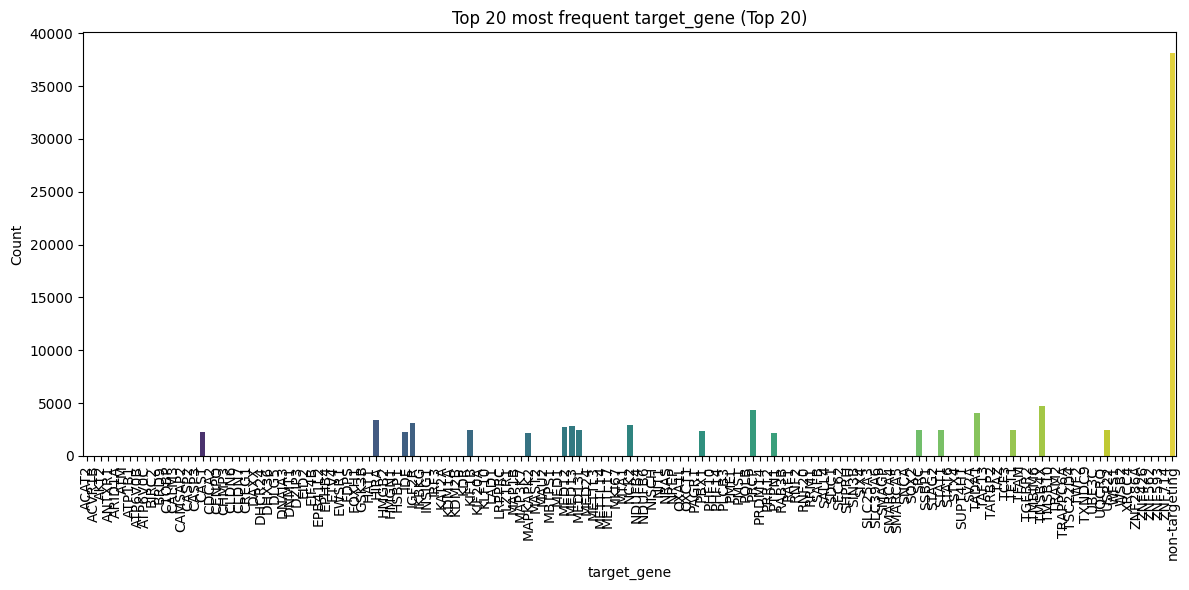

/tmp/ipython-input-1436609122.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


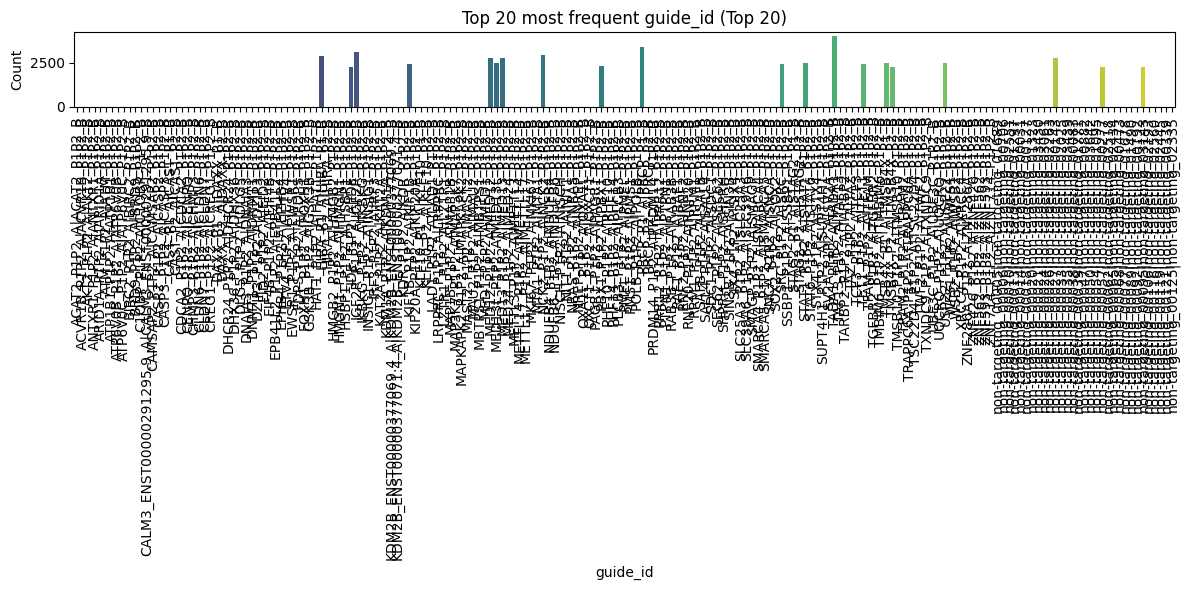

/tmp/ipython-input-1436609122.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adata.obs['batch'].value_counts().index, y=adata.obs['batch'].value_counts().values, palette='rocket')


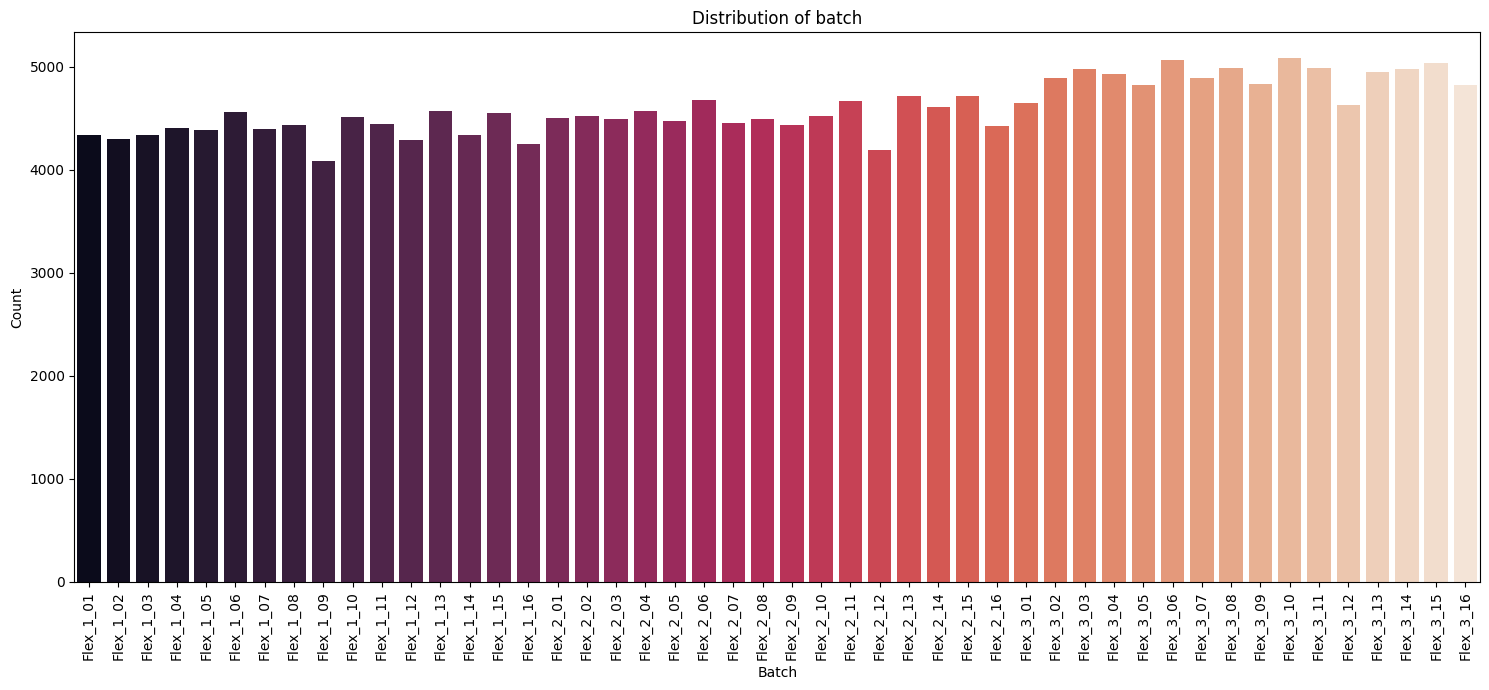

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_n_categories(dataframe, column, n=20, title_suffix=""):
    plt.figure(figsize=(12, 6))
    top_categories = dataframe[column].value_counts().head(n)
    sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
    plt.title(f'Top {n} most frequent {column} {title_suffix}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plotting distribution for 'target_gene'
plot_top_n_categories(adata.obs, 'target_gene', n=20, title_suffix='(Top 20)')

# Plotting distribution for 'guide_id'
plot_top_n_categories(adata.obs, 'guide_id', n=20, title_suffix='(Top 20)')

# Plotting distribution for 'batch'
# For 'batch', we can plot all since there are fewer unique values
plt.figure(figsize=(15, 7))
sns.barplot(x=adata.obs['batch'].value_counts().index, y=adata.obs['batch'].value_counts().values, palette='rocket')
plt.title('Distribution of batch')
plt.xlabel('Batch')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Create a subsampled AnnData object from the existing `adata` object by randomly selecting 10,000 observations, then preprocess this subsampled data by normalizing total counts to a median of 10,000 and applying a log1p transformation.

random index generation for subslicing

In [20]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Get the total number of observations
n_obs = adata.n_obs

# Number of samples to select
sample_size = 10000

# Generate random unique indices
random_indices = np.random.choice(n_obs, size=sample_size, replace=False)

print(f"Generated {len(random_indices)} random unique indices for subsampling.")

Generated 10000 random unique indices for subsampling.


putting to the memory the sampled datas

In [22]:
adata_subsampled = adata[random_indices, :].to_memory()

print(f"Shape of the subsampled AnnData object: {adata_subsampled.shape}")

Shape of the subsampled AnnData object: (10000, 18080)


Preprocess the subsampled `adata_subsampled` by normalizing total counts to a median of 10,000 + applying a log1p transformation.

 To normalize total counts to a target sum of 10,000, I will  explicitly set `target_sum=1e4`.



In [24]:
print('Normalizing total counts to a target sum of 10,000...')
sc.pp.normalize_total(adata_subsampled, target_sum=1e4)
print('Applying log1p transformation...')
sc.pp.log1p(adata_subsampled)

print('Preprocessing complete for adata_subsampled.')

Normalizing total counts to a target sum of 10,000...
Applying log1p transformation...
Preprocessing complete for adata_subsampled.


Run PCA on the preprocessed subsampled AnnData object to reduce its dimensionality.


In [25]:
print("Running PCA on adata_subsampled...")
sc.tl.pca(adata_subsampled)

print("Shape of PCA results (adata_subsampled.obsm['X_pca']):")
print(adata_subsampled.obsm['X_pca'].shape)

Running PCA on adata_subsampled...
Shape of PCA results (adata_subsampled.obsm['X_pca']):
(10000, 50)


Compute the k-nearest neighbors graph based on the PCA components, and then apply Uniform Manifold Approximation and Projection (UMAP) to visualize the data in a 2D embedding.


In [26]:
print("Computing k-nearest neighbors graph...")
sc.pp.neighbors(adata_subsampled, n_neighbors=10, n_pcs=50)
print("k-nearest neighbors graph computed.")

Computing k-nearest neighbors graph...
k-nearest neighbors graph computed.


 run UMAP on the `adata_subsampled` object to generate a 2D embedding and then print the shape of the UMAP embedding



In [27]:
print("Running UMAP...")
sc.tl.umap(adata_subsampled)

print("Shape of UMAP embedding (adata_subsampled.obsm['X_umap']):")
print(adata_subsampled.obsm['X_umap'].shape)

Running UMAP...
Shape of UMAP embedding (adata_subsampled.obsm['X_umap']):
(10000, 2)



Generate scatter plots of the PCA and UMAP embeddings, coloring the data points by the 'batch' variable.


Generating PCA plot colored by batch...


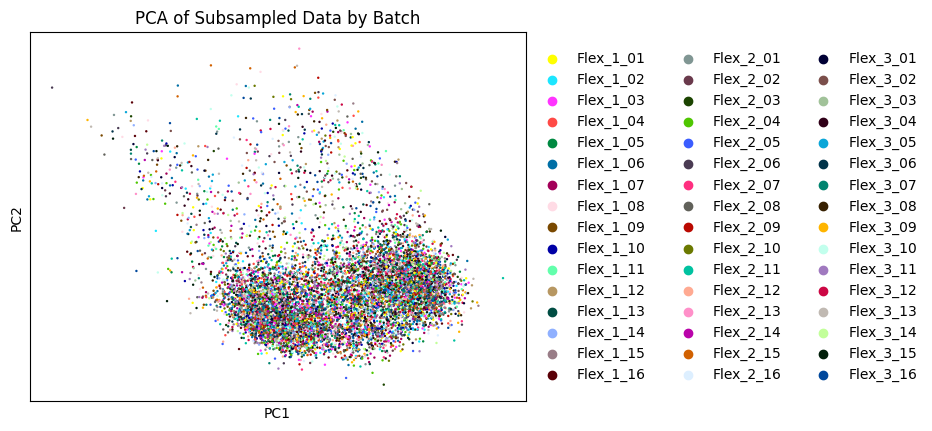

Generating UMAP plot colored by batch...


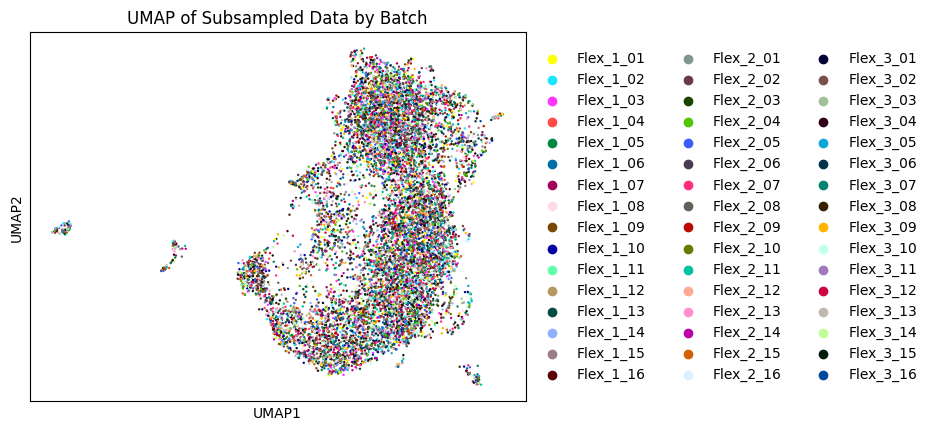

In [28]:
print('Generating PCA plot colored by batch...')
sc.pl.pca(adata_subsampled, color='batch', title='PCA of Subsampled Data by Batch')

print('Generating UMAP plot colored by batch...')
sc.pl.umap(adata_subsampled, color='batch', title='UMAP of Subsampled Data by Batch')

*   A subsampled AnnData object, `adata_subsampled`, was created by randomly selecting 10,000 observations from the original dataset (221273 obs).
*   The `adata_subsampled` object was preprocessed by normalizing total counts to a target sum of 10,000 and applying a `log1p` transformation.
*   Principal Component Analysis (PCA) was performed on the preprocessed subsampled data, reducing its dimensionality to 50 principal components for the 10,000 observations.
*   A k-nearest neighbors graph was computed, followed by Uniform Manifold Approximation and Projection (UMAP), resulting in a 2D embedding for all 10,000 observations in the subsampled dataset.
*   PCA and UMAP scatter plots, with data points colored by the 'batch' variable, were generated

